In [24]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [25]:
# fish_data = [[l, w] for l, w in zip(length,weight)]

# fish_data = []
# for l, w in zip(length,weight):
# fish_data.append([l, w])

In [33]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

In [34]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [35]:
# fish_target = [1] * 35 + [0] * 14
# 위아래 두개는 같은 것이다. numpy 활용법
z = np.ones(35)
o = np.zeros(14)

In [36]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [37]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [227]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=1)

In [228]:
kn.predict([[25, 150]])

array([1.])

In [229]:
distances, indexes = kn.kneighbors([[25, 150]])

In [230]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

# 모델 불러오기
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)

fish_model

KNeighborsClassifier(n_neighbors=1)

In [231]:
fish_model.predict([[30,555]])

array([1.])

In [232]:
fish_model.predict([[25, 150]])

array([1.])

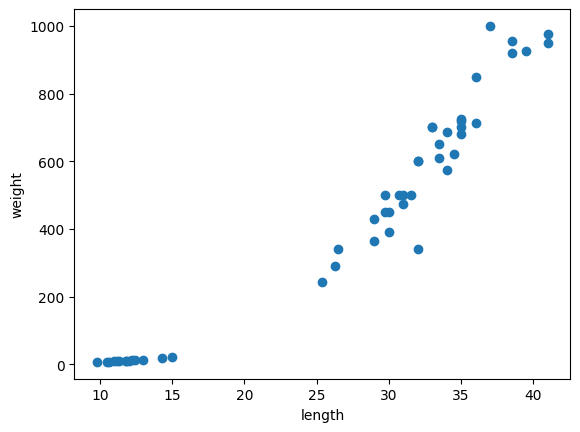

In [233]:
import matplotlib.pyplot as plt
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

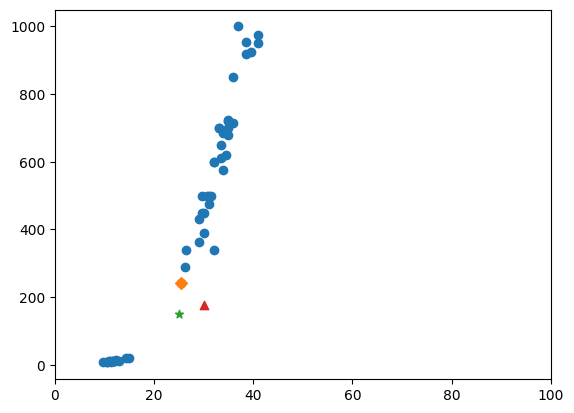

In [234]:
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')
plt.scatter(25, 150, marker="*")
plt.scatter(30, 176, marker="^")
plt.xlim((0,100))
plt.show()

In [235]:
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)

In [236]:
train_scaled = (fish_data - mean) / std
train_scaled
kn.fit(train_scaled, fish_target)

KNeighborsClassifier(n_neighbors=1)

In [237]:
domi = [25, 150]
domi_scaled = (domi - mean) / std
domi_scaled

array([-0.20271784, -0.90677444])

In [238]:
kn.predict([domi_scaled])

array([1.])

In [239]:
if kn.predict([[25,150]])[0] == 1:
    print('도미')
else:
    print('빙어')

도미


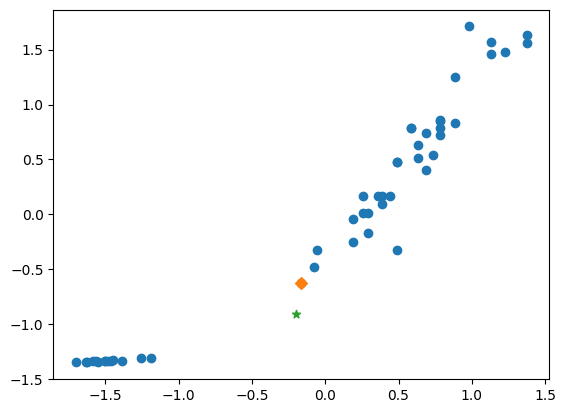

In [240]:
distances, indexes = kn.kneighbors([domi_scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.scatter(domi_scaled[0], domi_scaled[1], marker='*')
plt.show()